In [ ]:
# Build a prediction model of your choice (regression or supervised learning) to predict movie
# ratings (for all 400 movies) from personality factors only. Make sure to use cross-validation
# methods to avoid overfitting and characterize the accuracy of your model.

# PCA for personality questions
# 1. Load the personality question data
# 2. Compute the correlation matrix
# 3. Scale and center the data before PCA
# 4. PCA
# 5. Screeplot
# 6. Choose criterion
# 7. Interpret the factors
# 8. Express the original data in terms of the factor values

# Prediction model to predict all 400 movie ratings
# 1. Cross-validation: split the data into traing and test sets
# 2. Descriptive Statistics
# 3. Build linear regression model (predictor = personality factors; outcome = ratings of a movie )

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [125]:
# 1. Load the personality questions
df = pd.read_csv('movieReplicationSet.csv', sep=',')
personality = df.iloc[:,420:464] # personality questions 

dropnaIndex = personality[personality.isna().any(axis=1)].index

personality = personality.dropna() # drop NaN values
personality

,Is talkative,Tends to find fault with others,Does a thorough job,Is depressed/Blue,Is original/comes up with new ideas,Is reserved,Is helpful and unselfish with others,Can be somewhat careless,Is relaxed/handles stress well,Is curious about many different things,...,Prefers work that is routine,is outgoing/sociable,Is sometimes rude to others,Makes plans and follows through with them,Gets nervous easily,Likes to reflect/play with ideas,Has few artistic interests,Likes to cooperate with others,Is easily distracted,Is sophisticated in art or music or literature
1,2.0,3.0,4.0,1.0,3.0,5.0,3.0,4.0,3.0,3.0,...,4.0,1.0,3.0,4.0,2.0,3.0,1.0,3.0,2.0,3.0
2,4.0,2.0,4.0,2.0,3.0,3.0,4.0,4.0,2.0,4.0,...,2.0,3.0,2.0,3.0,4.0,4.0,2.0,5.0,3.0,3.0
3,5.0,3.0,5.0,4.0,5.0,3.0,4.0,1.0,2.0,5.0,...,3.0,3.0,2.0,3.0,4.0,4.0,1.0,4.0,4.0,4.0
4,4.0,4.0,4.0,4.0,2.0,3.0,4.0,4.0,2.0,4.0,...,2.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0
5,1.0,3.0,3.0,4.0,3.0,4.0,3.0,4.0,2.0,3.0,...,2.0,1.0,2.0,2.0,5.0,1.0,1.0,2.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,4.0,4.0,4.0,4.0,3.0,3.0,4.0,4.0,2.0,5.0,...,4.0,3.0,2.0,5.0,4.0,4.0,2.0,4.0,3.0,4.0
1093,5.0,5.0,5.0,2.0,5.0,4.0,5.0,5.0,5.0,4.0,...,4.0,5.0,4.0,4.0,5.0,5.0,4.0,5.0,5.0,4.0
1094,4.0,2.0,5.0,4.0,2.0,5.0,5.0,1.0,2.0,5.0,...,4.0,4.0,4.0,5.0,4.0,5.0,1.0,5.0,1.0,5.0
1095,4.0,2.0,4.0,3.0,5.0,5.0,5.0,5.0,4.0,4.0,...,3.0,2.0,2.0,3.0,5.0,4.0,2.0,4.0,4.0,5.0


In [126]:
# 2. Exploring data frames
predictors = personality.to_numpy()
predictors

array([[2., 3., 4., ..., 3., 2., 3.],
       [4., 2., 4., ..., 5., 3., 3.],
       [5., 3., 5., ..., 4., 4., 4.],
       ...,
       [4., 2., 5., ..., 5., 1., 5.],
       [4., 2., 4., ..., 4., 4., 5.],
       [5., 4., 5., ..., 5., 3., 5.]])

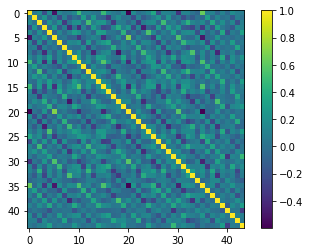

In [127]:
# 3. Correlation Heatmap
r = np.corrcoef(predictors,rowvar=False)
plt.imshow(r) 
plt.colorbar()
plt.show()

In [128]:
# 4. Scaling and centering the data before PCA
zscoredData = stats.zscore(predictors)

In [129]:
# 5. PCA
pca = PCA().fit(zscoredData)
eigVals = pca.explained_variance_ # eigenvalues
loadings = pca.components_*-1 # loadings
pcaData = pca.fit_transform(zscoredData)*-1 # rotated data

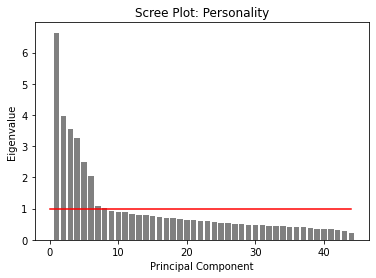

In [130]:
# 6. Screeplot and choosing the factors
numPredictors = 44
x = np.linspace(1, numPredictors, numPredictors)
plt.bar(x, eigVals, color='gray')
plt.plot([0, numPredictors],[1,1],color='red') 
plt.ylabel('Eigenvalue')
plt.xlabel('Principal Component')
plt.title('Scree Plot: Personality')
plt.show()

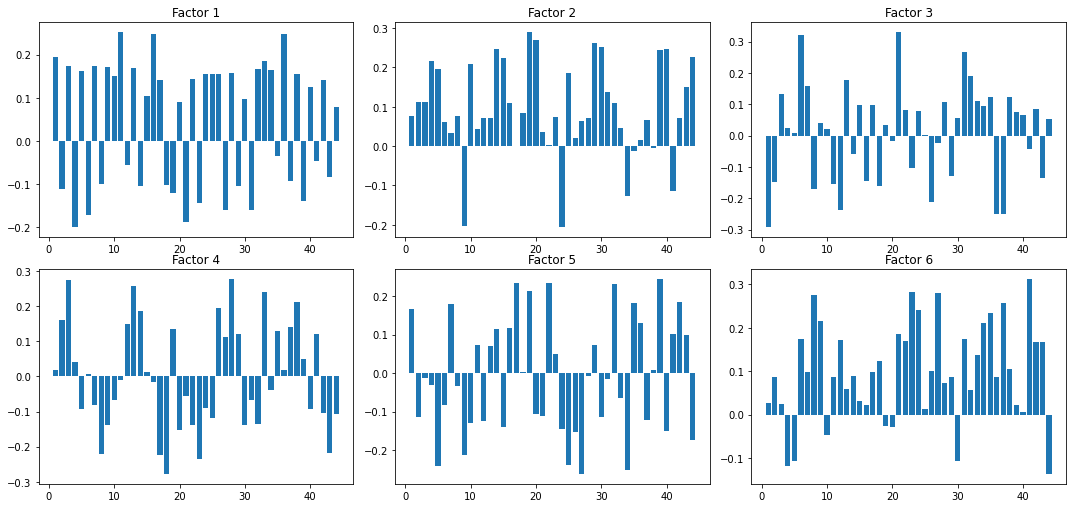

In [131]:
# 7. Interpreting the factors by plotting
fig,ax = plt.subplots(2,3,figsize=(15,7))
fig.tight_layout()

ax[0, 0].bar(x,loadings[0,:])
ax[0, 0].set_title('Factor 1')

ax[0, 1].bar(x,loadings[1,:])
ax[0, 1].set_title('Factor 2')

ax[0, 2].bar(x,loadings[2,:])
ax[0, 2].set_title('Factor 3')

ax[1, 0].bar(x,loadings[3,:])
ax[1, 0].set_title('Factor 4')

ax[1, 1].bar(x,loadings[4,:])
ax[1, 1].set_title('Factor 5')

ax[1, 2].bar(x,loadings[5,:])
ax[1, 2].set_title('Factor 6')

plt.show()

In [132]:
# Building a Model

# 1a. Store the transformed data - the predictors - as x:
x = np.column_stack((pcaData[:,0],pcaData[:,1], pcaData[:,2],
                    pcaData[:,3], pcaData[:,4], pcaData[:,5]))

# 1b. Get the ratings data
y_df = df.iloc[:,:400]

# 1c. Update the ratings data
y_np = y_df.to_numpy()
y = np.delete(y_np, dropnaIndex, 0)

# 1d. Replace NaN ratings to the median for each movie ratings
yCol_median = np.nanmedian(y, axis=0)

for i in range(400):
    y[:,i] = np.nan_to_num(y[:,i], nan=yCol_median[i])

In [133]:
# 2. EDA
print(np.count_nonzero(y <= 1))
print(np.count_nonzero(y <= 2))
print(np.count_nonzero(y <= 3))

10560
54336
321456


In [134]:
# 3. Split the dataset into training and test set. 
from sklearn.model_selection import train_test_split

def crossValidation(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=25)
    return X_train, X_test, y_train, y_test

In [139]:
# 4. Support Vector Machines / Random forest model
numMovies = 400
X = x
y = y
accuracyScore_sum = 0
which_model = 1 # 0=SVM, 1=Random forest model

for i in range(numMovies): 
    X_train, X_test, y_train, y_test = crossValidation(X,y[:,i])
    label_encoder = preprocessing.LabelEncoder()
    y_train = label_encoder.fit_transform(y_train)
    y_test = label_encoder.fit_transform(y_test)
    clf = svm.SVC(kernel='linear').fit(X_train,y_train)
    sV = clf.support_vectors_ # Retrieve the support vectors from the model
    predictions = clf.predict(X_test) # Decision reflects who the model thinks will be depressed
    modelAccuracy = accuracy_score(y_test,predictions)
    accuracyScore_sum = accuracyScore_sum + modelAccuracy
    print('SVM model accuracy:', modelAccuracy)

SVM model accuracy: 0.9606060606060606
SVM model accuracy: 0.006060606060606061
SVM model accuracy: 0.6909090909090909
SVM model accuracy: 0.7787878787878788
SVM model accuracy: 0.703030303030303
SVM model accuracy: 0.012121212121212121
SVM model accuracy: 0.9030303030303031
SVM model accuracy: 0.803030303030303
SVM model accuracy: 0.030303030303030304
SVM model accuracy: 0.593939393939394
SVM model accuracy: 0.706060606060606
SVM model accuracy: 0.9
SVM model accuracy: 0.6787878787878788
SVM model accuracy: 0.9393939393939394
SVM model accuracy: 0.6242424242424243
SVM model accuracy: 0.9515151515151515
SVM model accuracy: 0.7484848484848485
SVM model accuracy: 0.7303030303030303
SVM model accuracy: 0.706060606060606
SVM model accuracy: 0.8606060606060606
SVM model accuracy: 0.8939393939393939
SVM model accuracy: 0.6
SVM model accuracy: 0.6666666666666666
SVM model accuracy: 0.9030303030303031
SVM model accuracy: 0.8666666666666667
SVM model accuracy: 0.9393939393939394
SVM model accur

SVM model accuracy: 0.0
SVM model accuracy: 0.8787878787878788
SVM model accuracy: 0.01818181818181818
SVM model accuracy: 0.7
SVM model accuracy: 0.8818181818181818
SVM model accuracy: 0.7181818181818181
SVM model accuracy: 0.0
SVM model accuracy: 0.8939393939393939
SVM model accuracy: 0.8424242424242424
SVM model accuracy: 0.8606060606060606
SVM model accuracy: 0.9363636363636364
SVM model accuracy: 0.07272727272727272
SVM model accuracy: 0.03636363636363636
SVM model accuracy: 0.06060606060606061
SVM model accuracy: 0.024242424242424242
SVM model accuracy: 0.03333333333333333
SVM model accuracy: 0.0
SVM model accuracy: 0.9242424242424242
SVM model accuracy: 0.01818181818181818
SVM model accuracy: 0.021212121212121213
SVM model accuracy: 0.7272727272727273
SVM model accuracy: 0.2545454545454545
SVM model accuracy: 0.9030303030303031
SVM model accuracy: 0.503030303030303
SVM model accuracy: 0.6303030303030303
SVM model accuracy: 0.048484848484848485
SVM model accuracy: 0.0030303030303

In [141]:
accuracyScore_sum / numMovies

0.4453409090909081

In [ ]:
%pip install mlxtend

from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_test, y_test, clf)
plt.show()

In [138]:
for i in range(numMovies):
        X_train, X_test, y_train, y_test = crossValidation(X,y[:,i])
        label_encoder = preprocessing.LabelEncoder()
        y_train = label_encoder.fit_transform(y_train)
        y_test = label_encoder.fit_transform(y_test)
        clf = RandomForestClassifier(n_estimators=100).fit(X_train,y_train)
        predictions = clf.predict(X_test) 
        modelAccuracy = accuracy_score(y_test,predictions)
        accuracyScore_sum2 = accuracyScore_sum + modelAccuracy
        print('Random forest model accuracy:', modelAccuracy)

0